In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load dataset as a data frame
tcp_complete = pd.read_csv("/home/yolanda/workspace/actual/pkts_test/dataset1_5pkts", delimiter=r"\s+",low_memory=False)
tcp_complete2 = pd.read_csv("/home/yolanda/workspace/actual/pkts_test/dataset2_5pkts", delimiter=r"\s+",low_memory=False)

print("-------------> Original Dataset -- Features: " + str(len(tcp_complete.columns))+ " Traffic Flows: " + str(len(tcp_complete.index)))
print(tcp_complete.head())

# Mark vpn flows
vpn_ip = ['138.100.156.254','138.100.156.244','138.100.156.253']
tcp_complete['is_vpn'] = tcp_complete['s_ip:15'].isin(vpn_ip)
tcp_complete2['is_vpn'] = tcp_complete2['s_ip:15'].isin(vpn_ip)

# Filter bad features
bad_features = [1, 2, 12, 15, 16, 18, 29, 30, 38, 39, 40, 41, 43, 50, 51, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 74, 75, 80, 81, 82, 84, 86, 87, 88, 89, 90, 91, 92, 97, 98, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131]
bad_features = [index - 1 for index in bad_features]

tcp_complete = tcp_complete.drop(tcp_complete.columns[bad_features], axis =1)
tcp_complete2 = tcp_complete2.drop(tcp_complete2.columns[bad_features], axis =1)

print("-------------> Filtered Dataset -- Features: " + str(len(tcp_complete.columns))+ " Traffic Flows: " + str(len(tcp_complete.index)))
print(tcp_complete.head())

# Get basic statistics
print(tcp_complete.describe())

-------------> Original Dataset -- Features: 132 Traffic Flows: 633299
        #c_ip:1  c_port:2  c_pkts_all:3  c_rst_cnt:4  c_ack_cnt:5  \
0  172.16.1.196     36774             1            0            0   
1  172.16.1.196     36774             1            0            0   
2  172.16.1.196     36774             2            0            1   
3  172.16.1.196     36774             3            0            2   
4  172.16.1.169     40624             1            0            0   

   c_ack_cnt_p:6  c_bytes_uniq:7  c_pkts_data:8  c_bytes_all:9  \
0              0               0              0              0   
1              0               0              0              0   
2              1               0              0              0   
3              1             178              1            178   
4              0               0              0              0   

   c_pkts_retx:10   ...     c_appdataT:123  s_appdataT:124  c_appdataB:125  \
0               0   ...                

In [2]:
# Create training and test data
if 'tcp_complete2' not in globals(): # divide the dataset; 75% training 
    tcp_complete['is_train'] = np.random.uniform(0, 1, len(tcp_complete)) <= .75
    train, test = tcp_complete[tcp_complete['is_train']==True], tcp_complete[tcp_complete['is_train']==False]
else: # use different captures for training and testing
    train =  tcp_complete
    test = tcp_complete2
    
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 633299
Number of observations in the test data: 611116


In [3]:
# Create a list of the feature column's names
features = tcp_complete.columns[:-3] # remove the tag from the features used to train

# View features
print(features)
len(features)

Index(['c_pkts_all:3', 'c_rst_cnt:4', 'c_ack_cnt:5', 'c_ack_cnt_p:6',
       'c_bytes_uniq:7', 'c_pkts_data:8', 'c_bytes_all:9', 'c_pkts_retx:10',
       'c_bytes_retx:11', 'c_syn_cnt:13', 'c_fin_cnt:14', 's_pkts_all:17',
       's_ack_cnt:19', 's_ack_cnt_p:20', 's_bytes_uniq:21', 's_pkts_data:22',
       's_bytes_all:23', 's_pkts_retx:24', 's_bytes_retx:25', 's_pkts_ooo:26',
       's_syn_cnt:27', 's_fin_cnt:28', 'durat:31', 'c_first:32', 's_first:33',
       'c_last:34', 's_last:35', 'c_first_ack:36', 's_first_ack:37',
       'con_t:42', 'http_t:44', 'c_rtt_avg:45', 'c_rtt_min:46', 'c_rtt_max:47',
       'c_rtt_std:48', 'c_rtt_cnt:49', 's_rtt_avg:52', 's_rtt_min:53',
       's_rtt_max:54', 's_rtt_std:55', 's_rtt_cnt:56', 'c_mss_max:71',
       'c_mss_min:72', 'c_win_max:73', 'c_cwin_max:76', 'c_cwin_min:77',
       'c_cwin_ini:78', 'c_pkts_rto:79', 'c_pkts_unk:83', 'c_pkts_unrto:85',
       's_mss:93', 's_mss_max:94', 's_mss_min:95', 's_win_max:96',
       's_cwin_max:99', 's_cwin_mi

57

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
import matplotlib.pyplot as plt

#C = 0.3  # SVM regularization parameter
#poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(train[features], train['tag:132'])

#rbf_svc = svm.SVC(kernel='rbf', gamma=0.3, C=C)
#rbf_svc.fit(train[features], train['tag:132'])
C = 1.0  # SVM regularization parameter
svm = svm.SVC(kernel='linear', C=C).fit(train[features], train['tag:132'])

#plot_coefficients(svm, features)

# Train The Random Forest Classifier
#clf = RandomForestClassifier(n_jobs=4, n_estimators=100,random_state=0)
# Train the Classifier to take the training features and learn how they relate
# to the training the tags
#clf.fit(train[features], train['tag:132'])

In [10]:
# Apply the Classifier to the test data 
preds = svm.predict(test[features])
print(preds)

[2 2 2 ... 2 2 2]


In [11]:
# Create confusion matrix
pd.crosstab(test['tag:132'], preds, rownames=['Actual Tags'], colnames=['Predicted tags'])

Predicted tags,0,1,2,3
Actual Tags,,,,
0,80387,7,17,1
1,606,26486,383416,29
2,3,3228,62938,0
3,22,269,53701,6


In [12]:
from sklearn.metrics import *

print("\t Mean accuracy score: %1.6f" % accuracy_score(test['tag:132'], preds))
print("\t Mean Precision score: %1.6f" % precision_score(test['tag:132'], preds,average='micro'))
print("\t Mean Recall score: %1.3f" % recall_score(test['tag:132'], preds,average='micro'))
print("\t Mean F1 score: %1.3f\n" % f1_score(test['tag:132'], preds,average='micro'))

	 Mean accuracy score: 0.277880
	 Mean Precision score: 0.277880
	 Mean Recall score: 0.278
	 Mean F1 score: 0.278



IndexError: index 66 is out of bounds for axis 1 with size 60

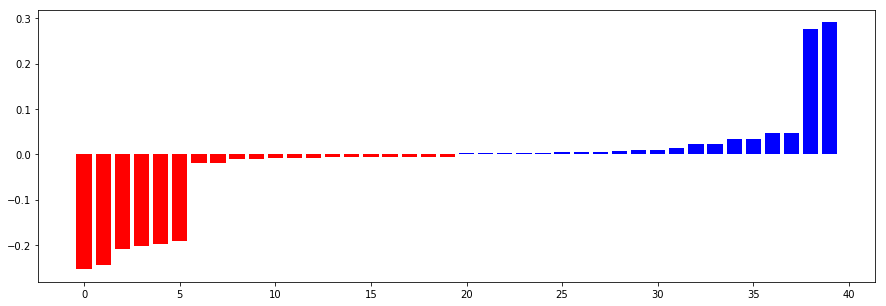

In [19]:
import matplotlib.pyplot as plt

def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()

# View a list of the features and their importance scores
plot_coefficients(svm, tcp_complete.columns)